In [1]:
# import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
# read in file, view
df = pd.read_csv('ML_data_set.csv')
df.head()

,Zip_Code,Total_Population,Median_Income,num_of_fast_food,num_of_mex_restaurants,Labels,Brand,Address,City,State,Probability
0,601.0,17599.0,11757.0,NaN,NaN,0.0,NaN,0,0,0,NaN
1,602.0,39209.0,16190.0,NaN,NaN,0.0,NaN,0,0,0,NaN
2,603.0,50135.0,16645.0,NaN,NaN,0.0,NaN,0,0,0,NaN
3,606.0,6304.0,13387.0,NaN,NaN,0.0,NaN,0,0,0,NaN
4,610.0,27590.0,18741.0,NaN,NaN,0.0,NaN,0,0,0,NaN


In [4]:
# drop non-features, view
df2 = df.drop("Zip_Code", axis=1)
df2 = df2.drop(["Brand","Address","City","State","Probability"], axis=1)
# remove negative numbers in Median Income
df2 = df2[(df2['Median_Income'] >= 0) | (df2['Median_Income'].isnull())]
# drop NaN rows
df2 = df2.dropna()

df2.describe()


,Total_Population,Median_Income,num_of_fast_food,num_of_mex_restaurants,Labels
count,20206.000000,20206.000000,20206.000000,20206.000000,20206.000000
mean,9772.492379,55804.923538,156.320350,98.818915,0.059982
std,14179.396001,23356.426111,253.499781,192.223122,0.237460
min,25.000000,2499.000000,0.000000,0.000000,0.000000
25%,897.000000,41199.000000,24.000000,15.000000,0.000000
50%,3120.000000,50938.000000,69.000000,40.000000,0.000000
75%,13040.250000,63928.500000,184.000000,104.000000,0.000000
max,114647.000000,250001.000000,6200.000000,6100.000000,1.000000


In [5]:
# Create feature matrix
#X = df2[['Total_Population','Median_Income','num_of_fast_food','num_of_mex-restaurants']]

# Create target vector
y = df2.Labels

# Remove first n observations
#X = X[20:0] 
#y = y[20:0]

# Create binary target vector indicating if class 0
y = np.where((y == 0), 0, 1)

# Look at the imbalanced target vector
y[:200]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [6]:
# Indicies of each class' observations
i_class0 = np.where(y == 0)[0]
i_class1 = np.where(y == 1)[0]

# Number of observations in each class
n_class0 = len(i_class0)
n_class1 = len(i_class1)

# For every observation of class 1, randomly sample from class 0 without replacement
i_class0_downsampled = np.random.choice(i_class0, size=n_class1, replace=False)

# Join together class 1's target vector with the downsampled class 0's target vector
NewVector = np.hstack((y[i_class1], y[i_class0_downsampled]))

In [7]:
vector1 = pd.DataFrame(i_class1)
vector1 = vector1.rename(columns={ vector1.columns[0]: "Index" })
vector1['class'] = 1
vector1

,Index,class
0,10,1
1,14,1
2,21,1
3,26,1
4,50,1
5,175,1
6,185,1
7,201,1
8,207,1
9,217,1


In [8]:
vector0 = pd.DataFrame(i_class0_downsampled)
vector0 = vector0.rename(columns={ vector0.columns[0]: "Index" })
vector0['class'] = 0
vector0.tail()

,Index,class
1207,4137,0
1208,2365,0
1209,18508,0
1210,2990,0
1211,10899,0


In [9]:
df_downsample = pd.concat([vector1, vector0])
df_downsample.head()

,Index,class
0,10,1
1,14,1
2,21,1
3,26,1
4,50,1


In [11]:
df3 = df_downsample.join(df, on='Index')
df4 = df3.drop("Zip_Code", axis=1)
df4 = df4.drop(["Brand","Address","City","State","Probability", "Index", "Labels"], axis=1)
# remove negative numbers in Median Income
df4 = df4[(df4['Median_Income'] >= 0) | (df4['Median_Income'].isnull())]
# drop NaN rows
df4 = df4.dropna()

df4.head()

,class,Total_Population,Median_Income,num_of_fast_food,num_of_mex_restaurants
5,1,17755.0,66681.0,138.0,63.0
6,1,399.0,51406.0,22.0,20.0
7,1,14774.0,61112.0,79.0,29.0
8,1,44775.0,47614.0,29.0,17.0
9,1,1197.0,57014.0,6.0,7.0


In [12]:
# Assign X (data) and y (target)
X = df4.drop("class", axis=1)
y = df4["class"]
print(X.shape, y.shape)

(1934, 4) (1934,)


In [13]:
# Try different classification techniques
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 

clf = LogisticRegression(random_state=1)
clf_A = GaussianNB()
clf_B = DecisionTreeClassifier(random_state=1)
clf_C = GradientBoostingClassifier(random_state=1)
clf_D = RandomForestClassifier(random_state=1)
#clf_E = SVC(kernel='linear')
clf_F = KNeighborsClassifier()

C:\Users\Teresa Barajas\Anaconda\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [14]:
# split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
clf.fit(X_train,list(y_train.values))
y_pred = clf.predict(X_test)
print('Accuracy: ',clf.score(X_test,list(y_test.values)))
print('Precision: ',precision_score(list(y_test.values),y_pred))
print('Recall: ',recall_score(list(y_test.values),y_pred))
print('F1 Score: ',f1_score(list(y_test.values),y_pred))
print('Confusion Matrix: \n',confusion_matrix(list(y_test.values), y_pred))

Accuracy:  0.5165289256198347
Precision:  0.5173160173160173
Recall:  0.956
F1 Score:  0.6713483146067416
Confusion Matrix: 
 [[ 11 223]
 [ 11 239]]


In [16]:
clf_A.fit(X_train,list(y_train.values))
y_pred_A = clf_A.predict(X_test)
print('Accuracy: ',clf_A.score(X_test,list(y_test.values)))
print('Precision: ',precision_score(list(y_test.values),y_pred_A))
print('Recall: ',recall_score(list(y_test.values),y_pred_A))
print('F1 Score: ',f1_score(list(y_test.values),y_pred_A))
print('Confusion Matrix: \n',confusion_matrix(list(y_test.values), y_pred_A))

Accuracy:  0.5082644628099173
Precision:  0.5545454545454546
Recall:  0.244
F1 Score:  0.33888888888888885
Confusion Matrix: 
 [[185  49]
 [189  61]]


In [17]:
clf_B.fit(X_train,list(y_train.values))
y_pred_B = clf_B.predict(X_test)
print('Accuracy: ',clf_B.score(X_test,list(y_test.values)))
print('Precision: ',precision_score(list(y_test.values),y_pred_B))
print('Recall: ',recall_score(list(y_test.values),y_pred_B))
print('F1 Score: ',f1_score(list(y_test.values),y_pred_B))
print('Confusion Matrix: \n',confusion_matrix(list(y_test.values), y_pred_B))

Accuracy:  0.5392561983471075
Precision:  0.5569620253164557
Recall:  0.528
F1 Score:  0.5420944558521561
Confusion Matrix: 
 [[129 105]
 [118 132]]


In [18]:
clf_C.fit(X_train,list(y_train.values))
y_pred_C = clf_C.predict(X_test)
print('Accuracy: ',clf_C.score(X_test,list(y_test.values)))
print('Precision: ',precision_score(list(y_test.values),y_pred_C))
print('Recall: ',recall_score(list(y_test.values),y_pred_C))
print('F1 Score: ',f1_score(list(y_test.values),y_pred_C))
print('Confusion Matrix: \n',confusion_matrix(list(y_test.values), y_pred_C))

Accuracy:  0.5413223140495868
Precision:  0.5538461538461539
Recall:  0.576
F1 Score:  0.5647058823529412
Confusion Matrix: 
 [[118 116]
 [106 144]]


In [19]:
clf_D.fit(X_train,list(y_train.values))
y_pred_D = clf_D.predict(X_test)
print('Accuracy: ',clf_D.score(X_test,list(y_test.values)))
print('Precision: ',precision_score(list(y_test.values),y_pred_D))
print('Recall: ',recall_score(list(y_test.values),y_pred_D))
print('F1 Score: ',f1_score(list(y_test.values),y_pred_D))
print('Confusion Matrix: \n',confusion_matrix(list(y_test.values), y_pred_D))

Accuracy:  0.5516528925619835
Precision:  0.5797101449275363
Recall:  0.48
F1 Score:  0.525164113785558
Confusion Matrix: 
 [[147  87]
 [130 120]]


In [20]:
clf_F.fit(X_train,list(y_train.values))
y_pred_F = clf_F.predict(X_test)
print('Accuracy: ',clf_F.score(X_test,list(y_test.values)))
print('Precision: ',precision_score(list(y_test.values),y_pred_F))
print('Recall: ',recall_score(list(y_test.values),y_pred_F))
print('F1 Score: ',f1_score(list(y_test.values),y_pred_F))
print('Confusion Matrix: \n',confusion_matrix(list(y_test.values), y_pred_F))

Accuracy:  0.5206611570247934
Precision:  0.53515625
Recall:  0.548
F1 Score:  0.541501976284585
Confusion Matrix: 
 [[115 119]
 [113 137]]


In [21]:
#clf_E.fit(X_train,list(y_train.values))
#y_pred_E = clf_E.predict(X_test)
#print('Accuracy: ',clf_E.score(X_test,list(y_test.values)))
#print('Precision: ',precision_score(list(y_test.values),y_pred_E))
#print('Recall: ',recall_score(list(y_test.values),y_pred_E))
#print('F1 Score: ',f1_score(list(y_test.values),y_pred_E))
#print('Confusion Matrix: \n',confusion_matrix(list(y_test.values), y_pred_E))

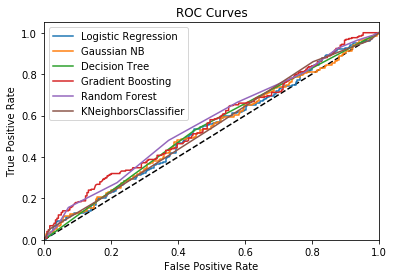

In [23]:
y_score = clf.decision_function(X_test)
y_score_A = clf_A.predict_proba(X_test)[:,1]
y_score_B = clf_B.predict_proba(X_test)[:,1]
y_score_C = clf_C.decision_function(X_test)
y_score_D = clf_D.predict_proba(X_test)[:,1]
y_score_F = clf_F.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test.values,y_score)
fpr_A, tpr_A, _ = roc_curve(y_test.values,y_score_A)
fpr_B, tpr_B, _ = roc_curve(y_test.values,y_score_B)
fpr_C, tpr_C, _ = roc_curve(y_test.values,y_score_C)
fpr_D, tpr_D, _ = roc_curve(y_test.values,y_score_D)
fpr_F, tpr_F, _ = roc_curve(y_test.values,y_score_F)
plt.plot([0,1],[0,1],'k--')

plt.plot(fpr,tpr,label='Logistic Regression')
plt.plot(fpr_A,tpr_A,label='Gaussian NB')
plt.plot(fpr_B,tpr_B,label='Decision Tree')
plt.plot(fpr_C,tpr_C,label='Gradient Boosting')
plt.plot(fpr_D,tpr_D,label='Random Forest')
#plt.plot(fpr_E,tpr_E,label='SVM')
plt.plot(fpr_F,tpr_F,label='KNeighborsClassifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig("roc_curves")

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(X)

In [ ]:
df_ml_features_scaled = scaler.transform(X)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(df_ml_features_scaled, \
                                                    y, test_size = 0.2, random_state = 10,\
                                                    stratify = y)

In [ ]:
clf.fit(X_train_scaled,list(y_train_scaled.values))
y_pred_scaled = clf.predict(X_test_scaled)
print('Accuracy: ',clf.score(X_test_scaled,list(y_test_scaled.values)))
print('Precision: ',precision_score(list(y_test_scaled.values),y_pred_scaled))
print('Recall: ',recall_score(list(y_test_scaled.values),y_pred_scaled))
print('F1 Score: ',f1_score(list(y_test_scaled.values),y_pred_scaled))
print('Confusion Matrix: \n',confusion_matrix(list(y_test_scaled.values), y_pred_scaled))

In [ ]:
clf.fit(X_train_scaled,list(y_train_scaled.values))
y_pred_scaled = clf.predict(X_test_scaled)
print('Accuracy: ',clf.score(X_test_scaled,list(y_test_scaled.values)))
print('Precision: ',precision_score(list(y_test_scaled.values),y_pred_scaled,pos_label=False))
print('Recall: ',recall_score(list(y_test_scaled.values),y_pred_scaled,pos_label=False))
print('F1 Score: ',f1_score(list(y_test_scaled.values),y_pred_scaled,pos_label=False))
print('Confusion Matrix: \n',confusion_matrix(list(y_test_scaled.values), y_pred_scaled))

In [ ]:
clf_C.fit(X_train_scaled,list(y_train_scaled.values))
y_pred_scaled_C = clf_C.predict(X_test_scaled)
print('Accuracy: ',clf_C.score(X_test_scaled,list(y_test_scaled.values)))
print('Precision: ',precision_score(list(y_test_scaled.values),y_pred_scaled_C,pos_label=False))
print('Recall: ',recall_score(list(y_test_scaled.values),y_pred_scaled_C,pos_label=False))
print('F1 Score: ',f1_score(list(y_test_scaled.values),y_pred_scaled_C,pos_label=False))
print('Confusion Matrix: \n',confusion_matrix(list(y_test_scaled.values), y_pred_scaled_C))

In [ ]:
# DF with non-CMG locations
X2 = df[df['Labels'] != 1]
X2 = X2.drop(["Brand","Address","City","State","Prediction","Labels","Zip_Code"], axis=1)
# remove negative numbers in Median Income
X2 = X2[(X2['Median_Income'] >= 0) | (X2['Median_Income'].isnull())]
# drop NaN rows
X2 = X2.dropna()
#X2 = X2.set_index('Zip_Code')
X2.describe()

In [ ]:
predictions2 = clf_B.predict(X2)
estimates = pd.DataFrame(predictions2)
bins = pd.cut(estimates[0], [0, .55, .6, .7, .9, .99, 1])

estimates.groupby(bins)[0].agg(['count'])
